<a href="https://colab.research.google.com/github/cristina-ap/PMP-2024/blob/main/tema_5_laborator_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

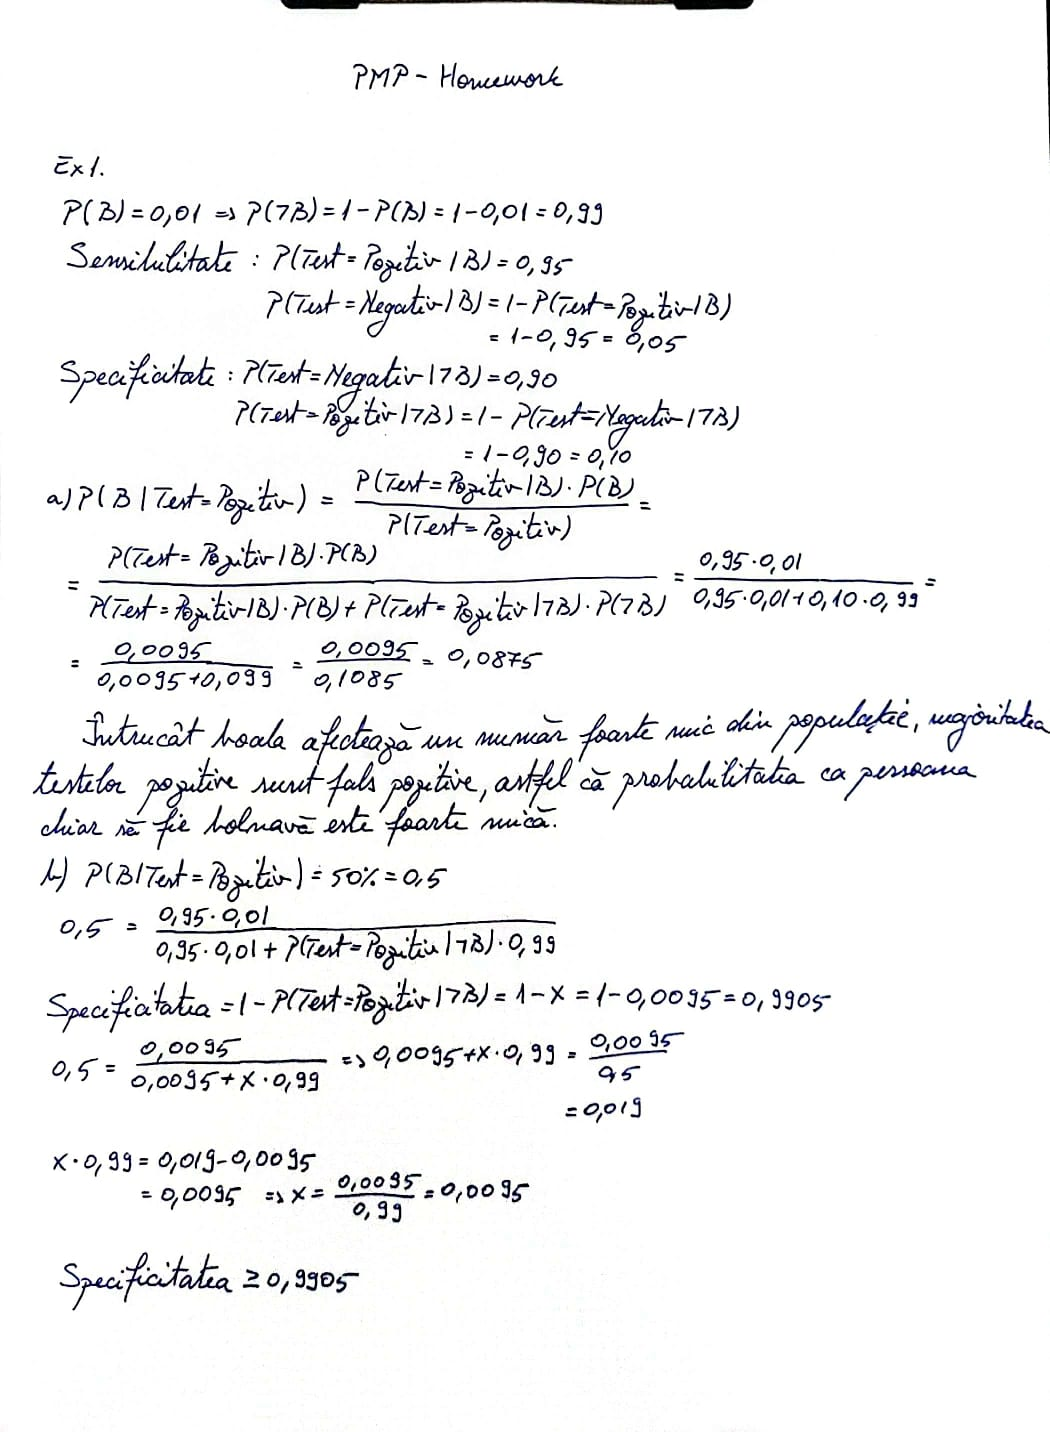

In [8]:
from scipy.stats import poisson, expon

clienti_pe_ora_mediu = 20
durata_comanda_mediu = 2
timp_max = 15
max_prob = 0.95

def simulare_asteptare(alpha, nr_simulari=10000):
    succes = 0

    for _ in range(nr_simulari):
        numar_clienti = poisson.rvs(clienti_pe_ora_mediu)
        durata_comanda = expon.rvs(scale=durata_comanda_mediu, size=numar_clienti)
        durata_gatire = expon.rvs(scale=alpha, size=numar_clienti)

        timp_total = durata_comanda + durata_gatire

        if all(timp_total <= timp_max):
            succes += 1

    return succes / nr_simulari

valori_alpha = [i / 10 for i in range(10, 100)]
max_alpha = None

for alpha in valori_alpha:
    prob = simulare_asteptare(alpha)
    if prob >= max_prob:
        max_alpha = alpha
    else:
        break

print(f"Valoarea maximă a lui α pentru a servi toți clienții în {timp_max} minute cu o probabilitate de 95% este aproximativ: {max_alpha:.2f} minute.")

def simulare_asteptare_medie(alpha, nr_simulari=10000):
    timp_asteptare = []

    for _ in range(nr_simulari):
        numar_clienti = poisson.rvs(clienti_pe_ora_mediu)

        durata_comanda = expon.rvs(scale=durata_comanda_mediu, size=numar_clienti)
        durata_gatire = expon.rvs(scale=alpha, size=numar_clienti)

        timp_total = durata_comanda + durata_gatire
        timp_asteptare.extend(timp_total)

    return sum(timp_asteptare) / len(timp_asteptare)

asteptare_medie = simulare_asteptare_medie(max_alpha)
print(f"Timpul mediu de așteptare pentru un client cu α = {max_alpha:.2f} este aproximativ: {asteptare_medie:.2f} minute.")


Valoarea maximă a lui α pentru a servi toți clienții în 15 minute cu o probabilitate de 95% este aproximativ: 1.60 minute.
Timpul mediu de așteptare pentru un client cu α = 1.60 este aproximativ: 3.61 minute.
